# **Presentación del caso**

Los datos provienen de una [**competencia de Kaggle**](https://www.kaggle.com/c/titanic), por eso la data que nombraremos como **summit contendrá la base para poder aplicar nuestro modelo ya completado** para subirlo a Kaggle donde evaluará en línea y de forma inmediata si es un buen modelo o no. 

Las columnas (variables) son las siguientes:
* **Sobrevivio**: Si la persona murió se registra 0, si sobrevivió registra 1
* **Pclass**: Status socioeconómico (1st = Alto, 2nd=Medio, 3rd=Bajo)
* **Name**: Nombre del pasajero
* **Genero**: Male (hombre) o Female (Mujer)
* **Edad**: Edad del pasajero en números
* **Hermanos**: N° hermanos que viajaron junto al pasajero (desde 0)
* **Padres_hijos**: N° padres y/o hijos que viajaron junto al pasajero (desde 0)
* **Ticket**: La clase de ticket que sacó el pasajero
* **Tarifa**: El costo del ticket que se compró para el pasaje
* **Cabin**: El número de cabina o habitación que ocupó durante el viaje
* **P_embarque**: Lugar donde abordó (C=Cherbourg, Q=Queenstown, S=Southampton)

In [1]:
"CELDA N°01"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random #Una librería para manejar números aleatorios
import missingno as ms #Librería muy útil para ver los valores nulos

#Usualmente salen advertencias de actualizaciones pasadas de las librerías, las ignoramos por ahora...
import warnings
warnings.filterwarnings('ignore')

In [2]:
"CELDA N°02"
#Importamos con pandas los archivos necesarios
data = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/Titanic/train.csv', index_col="IdPasajero")

# **Entedimiento de los datos**

In [3]:
"CELDA N°03"
#Mostramos los primeros registros de train (puedes repetir este paso para summit)
data

,Sobrevivio,Pclass,Name,Genero,Edad,Hermanos,Padres_hijos,Ticket,Tarifa,Cabin,P_embarque
IdPasajero,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
"CELDA N°04"
#Mostramos los principales indicadores de las variables cuantitativas (puedes repetir este paso para summit)
data.describe()

,Sobrevivio,Pclass,Edad,Hermanos,Padres_hijos,Tarifa
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
"CELDA N°05"
#A través del método .value_counts() -no olvidar los paréntesis- obtenemos los valores diferentes de la columna Sobrevivio y el número de veces que se repiten
data['Sobrevivio'].value_counts()

0    549
1    342
Name: Sobrevivio, dtype: int64

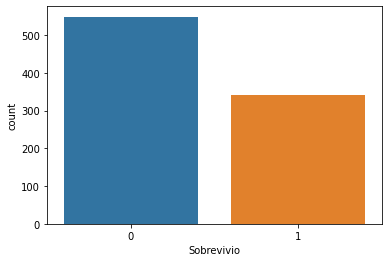

In [6]:
"CELDA N°06"
#Podemos obtener el mismo resultado de forma gráfica a través del método countplot
sns.countplot(data['Sobrevivio'])

Estamos entonces frente a una data **desbalanceada** lo que podría originar un sesgo del modelo al contar con muchos menos datos con **target = 1 (sobrevivió)**. Esto es importante tomarlo en cuenta aunque en esta ocasión no trabajaremos en ello.

# **Preprocesamiento de los datos**

## **Selección de variables relevantes**

**Eliminaremos** las variables que **no son significativas** para predecir si una persona sobrevive o no dentro del Titanic:
- Nombre: No identificamos ningún valor a partir del nombre para predecir la supervivencia del pasajero
- Ticket: Si bien se podría pensar que el ticket nos daría algún criterio, en este caso no se ha encontrado una relación directa.
- Cabin: La misma razón qu el Ticket.

In [7]:
"CELDA N°07"
#Con el método .drop se elimina lo que está detallado dentro de los paréntesis -si es una columna debes poner axis=1, si es una fila axis=0
data.drop(['Name','Ticket','Cabin'], axis = 1,inplace=True) #con el parámetro inplace=True se actualiza o sobreescribe el dataset train

In [8]:
data.head()

,Sobrevivio,Pclass,Genero,Edad,Hermanos,Padres_hijos,Tarifa,P_embarque
IdPasajero,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


## **Detectando y procesando vacíos**

### *Missingno*: 

Grafica nuestro dataframe para ver las columnas que tienen datos vacíos(representados por los espacios en blanco).

**Se recomienda su uso cuando el dataset no cuenta con muchas columnas**

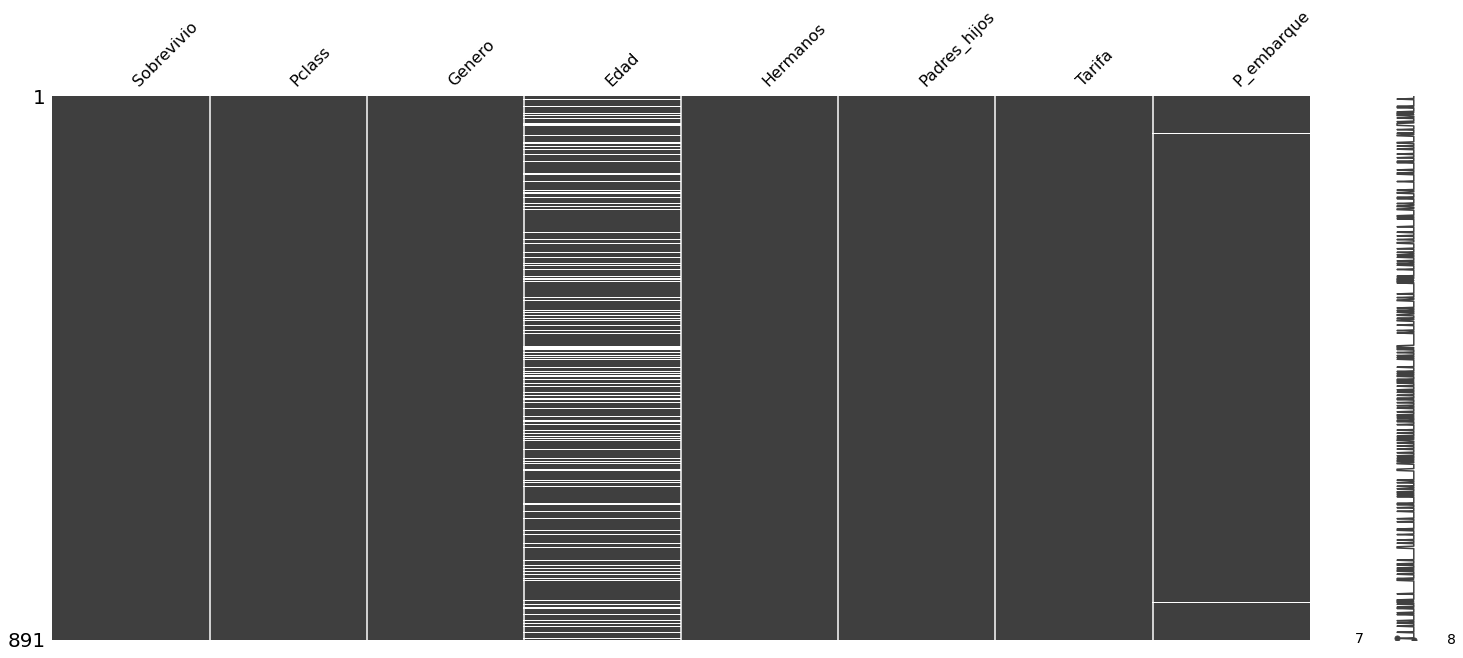

In [9]:
"CELDA N°08"
#A través del método .matrix de la librería missingno -renombrada como ms- obtenemos la gráfica de los nulos
ms.matrix(data)

### *Máscaras de filtro*

Puedes aplicar dos métodos:

- **loc:** Debes declarar dos parámetros en el siguiente orden: **(filas, columnas)**
- **iloc:** Es necesario indicar los **índices de las filas y columnas** (número entero)

Para mayor detalle puedes consultar [este artículo del blog de Analytics Vidhya](https://www.analyticsvidhya.com/blog/2020/02/loc-iloc-pandas/)

In [ ]:
"CELDA N°09"
#Elaboramos un bucle (repeticiones) para evaluar en cada columna isna y sum
for col in data.loc[:, data.isna().any()].columns:
  print('En la columna',col,'hay',data[col].isna().sum(),'valores nulos')

En la columna Edad hay 177 valores nulos
En la columna P_embarque hay 2 valores nulos


### *Reemplazando nulos*

Vamos a definir una **función** para llenar automáticamente los vacíos para **variables numéricas**:

In [ ]:
"CELDA N°10"
#Crearemos una función para llenar de manera random dentro del intervalo de la media y desviación estándar
def llena_nan_con_media_y_std(df,col='Edad'):
    nan = df[df[col].isna()] #el dataset de los que tienen la columna (col = 'Edad' ) con valores nulos
    min_ = df[col].mean() - df[col].std() #El comienzo de nuestro intervalo, la media menos la desv. estandar.
    max_ = df[col].mean() + df[col].std() #El final de nuestro intervalo, la media más la desv. estandar.
    for i in nan.index: #Para cada i en los index de mi data nula
        random_num = random.uniform(int(min_),int(max_)) #randomizo dentro de los intervalos que quiero y especifico que quiero enteros
        df[col].loc[i] = random_num #Reemplazo los valores dentro de mi data original.

In [ ]:
"CELDA N°11"
#Aplicamos la función para reemplazar los nulos de la columna Edad
llena_nan_con_media_y_std(data)

Para reemplazar los valores nulos de las **variables categóricas** (P_embarque y Tarifa) imputamos la **moda** de ambas variables:

In [ ]:
"CELDA N°12"
#Con el método .fillna reemplazamos los vacíos de la columna P_embarque con la moda por ser el puerto de embarque más repetido 
data['P_embarque'].fillna(data['P_embarque'].mode()[0], inplace=True)

## **Detectando y procesando outliers**

### *Boxplot*

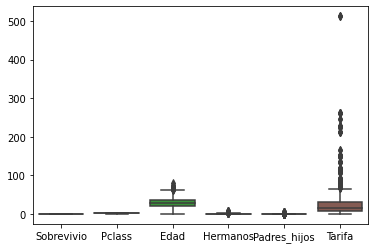

In [ ]:
"CELDA N°13"
#Aplicamos el método boxplot de la librería seaborn indicando data como fuente de datos
sns.boxplot(data=data)

Viendo el boxplot es evidente que los datos **más alejados** del resto se ubican en la variable **Tarifa**.

Para ello procedemos a reemplazarlos con el **percentil 95**.

### *Reemplazando outliers*

In [ ]:
"CELDA N°14"
#Aplicamos .index para obtener las filas superiores del percentil 95 y .loc para reemplazar los outliers por el percentil 95
outliers = data[data['Tarifa'] > data['Tarifa'].quantile(.95)].index
data.loc[outliers,'Tarifa'] = data['Tarifa'].quantile(.95)

In [ ]:
data.describe()

,Sobrevivio,Pclass,Edad,Hermanos,Padres_hijos,Tarifa
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.538604,0.523008,0.381594,27.720486
std,0.486592,0.836071,13.517320,1.102743,0.806057,29.225083
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,37.579963,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,112.079150


## **Feature Engineering:**



En situaciones de supervivencia antes desastres un factor muy importante es la familia. En este caso hay dos variables relacionadas a la familia del pasajero (Hermanos & Padres_hijos).

Por ello hemos considerado relevante crear **dos variables**:
*   Miembros_familia: **total** de **familiares incluyendo** al pasajero
*   Viaja_solo: 1 = si el pasajero **viajaba sin ningún familiar**, 0 = si el pasajero **viajaba con al menos 1 familiar**

sola o acompañada en la nave.

In [ ]:
"CELDA N°15"
#Creamos una columna nueva para contar el total entre las columnas Hermanos y Padres_Hijos
data['Miembros_familia'] = data['Hermanos'] + data['Padres_hijos'] + 1 #(1 reempresenta a él o ella)

In [ ]:
"CELDA N°16"
#Creamos una columna nueva para distinguir los pasajeros que viajan solos
data['Viaja_solo'] = 1 
data['Viaja_solo'].loc[data['Miembros_familia'] > 1] = 0

In [ ]:
"CELDA N°17"
#Comprobamos las columnas creadas
data.head()

,Sobrevivio,Pclass,Genero,Edad,Hermanos,Padres_hijos,Tarifa,P_embarque,Miembros_familia,Viaja_solo
IdPasajero,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,2,0
2,1,1,female,38.0,1,0,71.2833,C,2,0
3,1,3,female,26.0,0,0,7.9250,S,1,1
4,1,1,female,35.0,1,0,53.1000,S,2,0
5,0,3,male,35.0,0,0,8.0500,S,1,1


## **Encodeando variables categóricas**

### **La presencia de menores de edad en el Titanic**
¿Dan prioridad a las mujeres con niños para que puedan ir directo a las naves de rescate? Para comprobar esto es necesario identificar si el pasajero es **niño**.

Para esto, introducimos un nuevo **valor** dentro de la **columna Género**.

In [ ]:
"CELDA N°18"
#Añadimos la categoría niño en la columna Genero para todas las filas cuyo valor en la columna Edad sea menor o igual a 12
data.loc[data['Edad']<=12,'Genero'] = 'niño'

### **Comparando el target con el Género**:

¿Influye el Género del pasajero con el valor de la columna Sobrevivio?

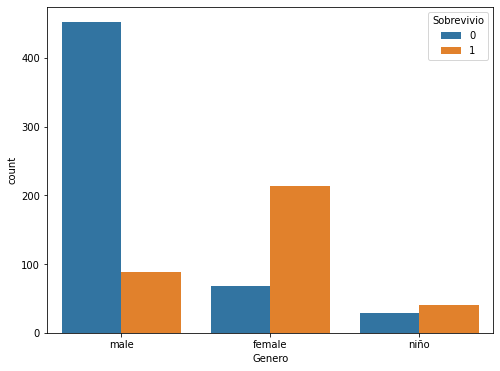

In [ ]:
"CELDA N°19"
#Utilizamos .countplot para realizar una gráfica de barras de la columna Genero distinguiendo los valores de la columna Sobrevivio
plt.figure(figsize=(8,6))
sns.countplot(x = 'Genero', data = data, hue="Sobrevivio")

### **Comparando el target con el Puerto de embarque**:

¿Influye el Puerto de embarque del pasajero con el valor de la columna Sobrevivio?

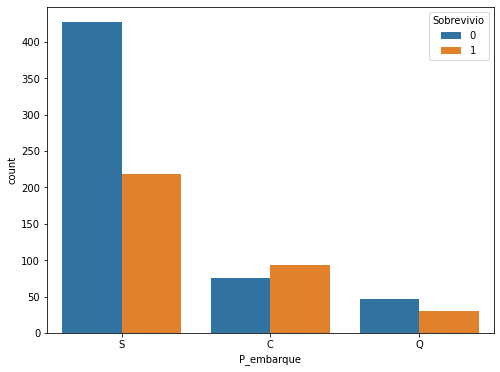

In [ ]:
"CELDA N°20"
#Utilizamos .countplot para realizar una gráfica de barras de la columna P_embarque distinguiendo los valores de la columna Sobrevivio
plt.figure(figsize=(8,6))
sns.countplot(x = 'P_embarque', data = data, hue="Sobrevivio")

### **Aplicando diccionario para Encodear**

In [ ]:
"CELDA N°21"
#Ahora podemos decir qué prioridades de categorías hay dentro de las variables P_embarque y Genero
cat_to_nums = {"P_embarque":  {"S": 1, "C": 3, "Q":5},
               "Genero": {"male":1,"niño":3,"female":5}}
data.replace(cat_to_nums, inplace = True)

In [ ]:
"CELDA N°22"
#Comprobamos los cambios realizados
data.head()

,Sobrevivio,Pclass,Genero,Edad,Hermanos,Padres_hijos,Tarifa,P_embarque,Miembros_familia,Viaja_solo
IdPasajero,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,1,2,0
2,1,1,5,38.0,1,0,71.2833,3,2,0
3,1,3,5,26.0,0,0,7.9250,1,1,1
4,1,1,5,35.0,1,0,53.1000,1,2,0
5,0,3,1,35.0,0,0,8.0500,1,1,1


## **Viendo correlaciones entre mis datos**

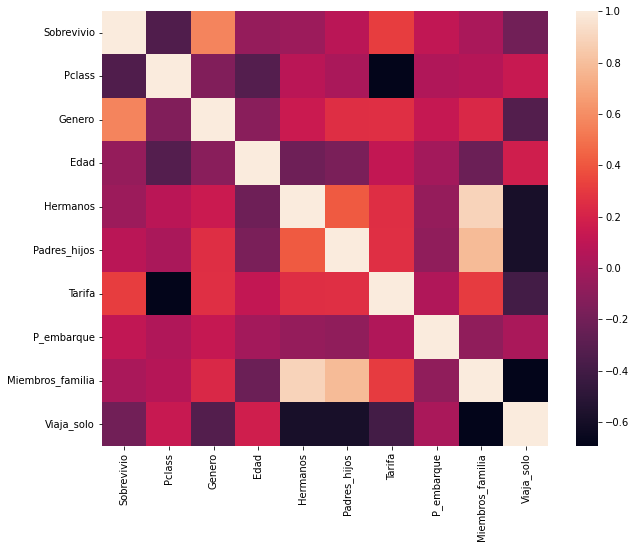

In [ ]:
"CELDA N°23"
#Con .corr() -no olvidar los paréntesis- podemos realizar un mapa de calor para identificar si hay correlación entre variables
corr_ = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_)

Según el gráfico las columnas **Miembros_de_fam**, **Hermanos**, **Padres_hijos** están correlacionadas.

Por ello solo nos quedaremos con la columna que nos aporta mayor información: **Miembros_de_fam**

In [ ]:
"CELDA N°24"
#Con .drop eliminamos las columnas Hermanos y Padres_hijos
data.drop(['Hermanos','Padres_hijos'],axis=1, inplace=True)

## Normalizando mi data:
Veamos la distribución de nuestros dos datos netamente numéricos que tenemos: Tarifa y Edad


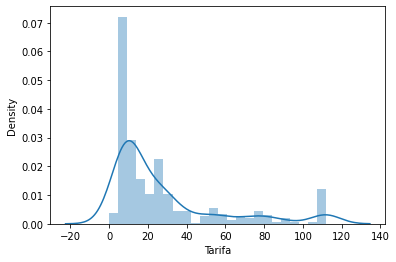

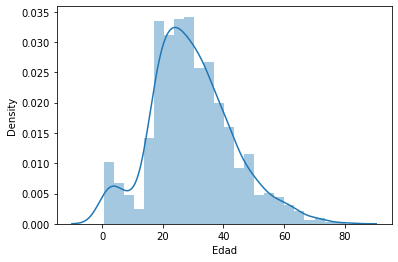

In [ ]:
"CELDA N°25"
#Con .distplot mostramos un histograma con una línea de tendencia de ambas variables
sns.distplot(data['Tarifa'])
plt.show()
sns.distplot(data['Edad'])
plt.show()

Las **escalas no difieren demasiado** ya que **ambas variables** se distribuyen **mayormente dentro de las decenas**.

Sin embargo por asuntos de didáctica para terminar el procesamiento de los datos vamos a normalizar ambas variables.

In [ ]:
"CELDA N°26"
#Importamos la librería normalize para la normalización de la data.
from sklearn.preprocessing import normalize

In [ ]:
"CELDA N°27"
#Seleccionamos las columnas que vamos a normalizar
data_to_norm = [data['Tarifa'],data['Edad']]

In [ ]:
"CELDA N°28"
#Aplicamos normalize sobre las columnas seleccionadas
data_normalizada = normalize(data_to_norm)

In [ ]:
"CELDA N°29"
#Asignamos cada los datos normalizados de cada columna: Tarifa y Edad
data = data.assign(Tarifa = data_normalizada[0]) 
data = data.assign(Edad = data_normalizada[1])

In [ ]:
"CELDA N°30"
#Comprobamos los cambios realizados
data.head()

,Sobrevivio,Pclass,Genero,Edad,Tarifa,P_embarque,Miembros_familia,Viaja_solo
IdPasajero,,,,,,,,
1,0,3,1,0.022691,0.006032,1,2,0
2,1,1,5,0.039193,0.059304,3,2,0
3,1,3,5,0.026816,0.006593,1,1,1
4,1,1,5,0.036099,0.044176,1,2,0
5,0,3,1,0.036099,0.006697,1,1,1
